In [1]:
# Imports
import pandas as pd
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

In [2]:
train_df = pd.read_csv('../Resources/scaled_train_data.csv')
train_df.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V22       V23       V24       V25  \
0  0.098698  0.363787  0.090794  ...  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425 -0.166974  ... -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  0.207643  ...  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024 -0.054952  ...  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  0.753074  ...  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Class  scaled_amount  scaled_time  
0 -0.189115  0.133558 -0.021053      0       1.788346    -1.623936  
1  0.125895 -0.008983  0.014724      0      -0.269786    -1.623936  
2 -0.139097 -0.055353 -0.059752      0       4.996638    -1.623910  
3 -0.221929  0.062723  0.061458      0       1.422468    -1.623910  
4  0.502292  0.219422  0.215153      0       0.672923    -1.623883  

[5 rows x 31 columns]

In [3]:
X = train_df.drop(columns=['Class'])
y = train_df['Class']

In [4]:
# Ensuring all data is numeric 
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

In [5]:
# Drop rows with NaN values
df_cleaned = pd.concat([X, y], axis=1).dropna()
X = df_cleaned.drop(columns=['Class'])
y = df_cleaned['Class']

In [6]:
# Using train_test_split to split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
scaled_amount = train_df['scaled_amount']
scaled_time = train_df['scaled_time']
train_df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
train_df.insert(28, 'scaled_amount', scaled_amount)
train_df.insert(29, 'scaled_time', scaled_time)
train_df.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V22       V23       V24       V25  \
0  0.098698  0.363787  0.090794  ...  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425 -0.166974  ... -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  0.207643  ...  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024 -0.054952  ...  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  0.753074  ...  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  scaled_amount  scaled_time  Class  
0 -0.189115  0.133558 -0.021053       1.788346    -1.623936      0  
1  0.125895 -0.008983  0.014724      -0.269786    -1.623936      0  
2 -0.139097 -0.055353 -0.059752       4.996638    -1.623910      0  
3 -0.221929  0.062723  0.061458       1.422468    -1.623910      0  
4  0.502292  0.219422  0.215153       0.672923    -1.623883      0  

[5 rows x 31 columns]

In [8]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [9]:
# Create the decision tree classifier instance
model = tree.DecisionTreeClassifier()
# Fit the model
model = model.fit(X_train_smote, y_train_smote)

In [10]:
# Making predictions
y_pred = model.predict(X_val)

In [11]:
# Calculate the accuracy score
acc_score = accuracy_score(y_val, y_pred)

print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.9972495012299766


In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.9972495012299766
Precision: 0.4097560975609756
Recall: 0.8
F1 Score: 0.5419354838709678


In [68]:
from sklearn.metrics import classification_report

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     51522
           1       0.41      0.80      0.54       105

    accuracy                           1.00     51627
   macro avg       0.70      0.90      0.77     51627
weighted avg       1.00      1.00      1.00     51627



In [50]:
# Create the parameter object for the randomized search estimator.
# Try adjusting n_neighbors with values of 1 through 19. 
# Adjust leaf_size by using a range from 1 to 500.
# Include both uniform and distance options for weights.
param_grid = {
    'max_depth': np.arange(1,40,2),
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}
param_grid

{'max_depth': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
        35, 37, 39]),
 'min_samples_split': [2, 10, 20],
 'min_samples_leaf': [1, 5, 10],
 'max_features': ['auto', 'sqrt', 'log2'],
 'criterion': ['gini', 'entropy']}

In [55]:
# Create the randomized search estimator
from sklearn.model_selection import RandomizedSearchCV
random_clf = RandomizedSearchCV(model, param_grid, random_state=0, verbose=3)

In [59]:
# Fit the model by using the randomized search estimator.
random_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_samples_split=2;, score=0.999 total time=   1.1s
[CV 2/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_samples_split=2;, score=0.999 total time=   0.8s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_samples_split=2;, score=0.999 total time=   0.9s
[CV 4/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_samples_split=2;, score=0.999 total time=   0.9s
[CV 5/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_samples_split=2;, score=0.999 total time=   0.7s
[CV 1/5] END criterion=entropy, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=10;, score=0.998 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=10;, scor

/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  F

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 5, 10],
                                        'min_samples_split': [2, 10, 20]},
                   random_state=0, verbose=3)

In [61]:
# List the best parameters for this dataset
print(random_clf.best_params_)

{'min_samples_split': 10, 'min_samples_leaf': 10, 'max_features': 'log2', 'max_depth': 21, 'criterion': 'entropy'}


In [66]:
# Make predictions with the hypertuned model
random_tuned_pred = random_clf.predict(X_train)

In [76]:
from sklearn.metrics import classification_report

print(classification_report(y_train, random_tuned_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    120208
           1       0.92      0.78      0.84       255

    accuracy                           1.00    120463
   macro avg       0.96      0.89      0.92    120463
weighted avg       1.00      1.00      1.00    120463



[[51401   121]
 [   21    84]]


<Axes: >

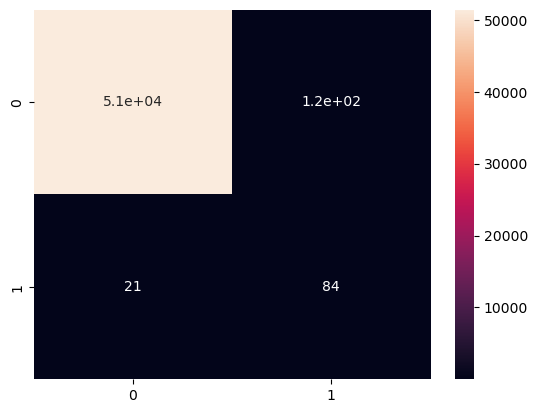

In [41]:
from sklearn.metrics import confusion_matrix
#Get the confusion matrix
cf_matrix = confusion_matrix(y_val, y_pred)
print(cf_matrix)

import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [13]:
# Create DOT data
dot_data = tree.export_graphviz(
    model, out_file=None, feature_names=X.columns, class_names=["0", "1"], filled=True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)
# Show graph
Image(graph.create_png())

In [14]:
# Save the tree as PDF
file_path = "decision_tree.pdf"
graph.write_pdf(file_path)

# Save the tree as PNG
file_path = "decision_tree.png"
graph.write_png(file_path)

True

In [92]:
import pickle
# Save the model to a file
with open('model.pkl', 'wb') as file: 
    pickle.dump(model, file)
# Load the model from the file
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)
# Use the loaded model to make predictions
predictions = model.predict(X_train) 